In [1]:
%matplotlib inline
import numpy as np ; import matplotlib.pyplot as plt ; import scipy.special ; from ipywidgets import * ; from pathlib import Path
import pandas as pd

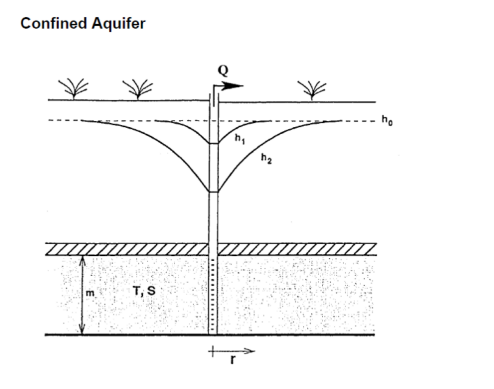

In [1]:
import matplotlib.pyplot as plt    
image = plt.imread('E:/15_REPOS/00_BETAMI/bin/Figure/Flow_well_confined.png'); fig, ax = plt.subplots() ; ax.imshow(image) ; ax.axis('off') ; plt.show() 

$$ s(r,t)=\frac{Q}{4\pi T}W(u) $$
$$ W(u) = \int_{u }^{+\infty} \frac{e^{-\tilde u}}{\tilde u}d\tilde u $$
$$ u = \frac{Sr^2}{4Tt} $$

In [2]:
output_folder = Path("./output_Theis_01")     ; output_folder.mkdir(exist_ok=True)

In [3]:
m_time = [1,1.5,2,2.5,3,4,5,6,8,10,12,14,18,24,30,40,50,60,100,120] # time in minutes
m_time_s = [i*60 for i in m_time] # time in seconds
m_ddown = [0.66,0.87,0.99,1.11,1.21,1.36,1.49,1.59,1.75,1.86,1.97,2.08,2.20,2.36,2.49,2.65,2.78,2.88,3.16,3.28]   # drawdown in meters
num_times = len(m_time)
r = 120  ;  b = 8.5  ; Qs = 0.3/60   ; Qd = Qs*60*24  ; Qm = 0.3    # m^3/s  m^3/d

In [4]:
df1 = pd.DataFrame(m_time_s)  ; df2 = pd.DataFrame(m_ddown) ; pe = pd.concat([df1, df2], axis=1)  ; pe.columns = ["(sec)", "(meters)"]
pe.to_csv(output_folder/ 'a_pe.csv') ; print('r(m), b(m), Qm(m^3/min) ... but then .. in secounds Qs = ', r, b, Qm, Qs)

r(m), b(m), Qm(m^3/min) ... but then .. in secounds Qs =  120 8.5 0.3 0.005


In [5]:
def well_function(u):
    return scipy.special.exp1(u)
def theis_u(T,S,r,t):
    u = r ** 2 * S / 4. / T / t
    return u
def theis_s(Q, T, u):
    s = Q / 4. / np.pi / T * well_function(u)
    return s
def theis_wu(Q, T, s):
    wu = s * 4. * np.pi * T / Q
    return wu

# (Here, the method computes the data for the well function. Those data can be used to generate a type curve.)
u_max = 1  ; r_max = 100000
u  = [u_max for x in range(r_max)]                         ; um     = [u_max for x in range(r_max)]
u_inv  = [r_max/u_max for x in range(r_max)]               ; um_inv = [r_max/u_max for x in range(r_max)]
w_u  = [well_function(u_max/r_max) for x in range(r_max)]  ; w_um = [well_function(u_max/r_max) for x in range(r_max)]
for x in range(1,r_max,1):
    if x>0:
        u[x] = x*u_max/r_max   ; u_inv[x] = 1/u[x]   ; w_u[x] = well_function(u[x])
def Theis_plot(T,S):
    K = T/b     ;    SS = S/b    ;   x = 0   # m/s ; # 1/m
    for t1 in m_time_s:
        um[x] = theis_u(T,S,r,t1) ; um_inv[x] = 1/um[x]  ; w_um[x] = theis_wu(Qs,T,m_ddown[x])  ; x = x+1
        
    fig = plt.figure(figsize=(5,3)) ; ax = fig.add_subplot(1, 1, 1) ; ax.plot(u_inv, w_u) ; ax.plot(um_inv[:num_times], w_um[:num_times],'ro')
    plt.yscale("log") ; plt.xscale("log")  ; plt.axis([1,1E5,1E-1,1E+1]) ; ax.set(xlabel='1/u', ylabel='w(u)',title='Theis drawdown')
    ax.grid(which="both") ; plt.legend(('well function','measured')) ; plt.show()

    print("Max/Min for (A) 1/u and (B) w(u) in the equivalent in measured data =", "% 5.2E"%min(um_inv[:num_times]),"% 5.2E"%max(um_inv[:num_times]),"% 5.2E"%min(w_um[:num_times]),"% 5.2E"%max(w_um[:num_times]))
    print("Transmissivity T = ","% 10.2E"% T, " m^2/s")
    print("Storativity    S = ","% 10.2E"% S, "[-]")
interact(Theis_plot,
         T=widgets.FloatLogSlider(value= 0.000794   , base=10,min=-6, max=3, step=0.1,readout=True,readout_format='.2e'),   # 7.94e-4
         S=widgets.FloatLogSlider(value= 0.00000158 , base=10,min=-9, max=1, step=0.1,readout=True,readout_format='.2e'))  # 1.58e-6

interactive(children=(FloatLogSlider(value=0.000794, description='T', max=3.0, min=-6.0, readout_format='.2e')…

<function __main__.Theis_plot(T, S)>